# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed May  4 11:29:44 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## 1D 

In [6]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.)
df

,dtime,x,y,energy
0,0.138076,0.016897,0.213216,41.078324
1,0.037126,0.434952,0.133975,41.918069
2,0.747935,0.135759,-0.108931,41.426482
3,0.665940,0.039029,0.330706,41.517783
4,0.383287,0.270588,-0.316067,39.426041
...,...,...,...,...
78459,0.199162,0.138128,-0.287801,42.133866
78460,0.906713,0.165132,0.343335,37.265716
78461,0.359153,-0.256950,0.076481,41.233723
78462,0.233917,-0.422621,-0.047660,41.514271


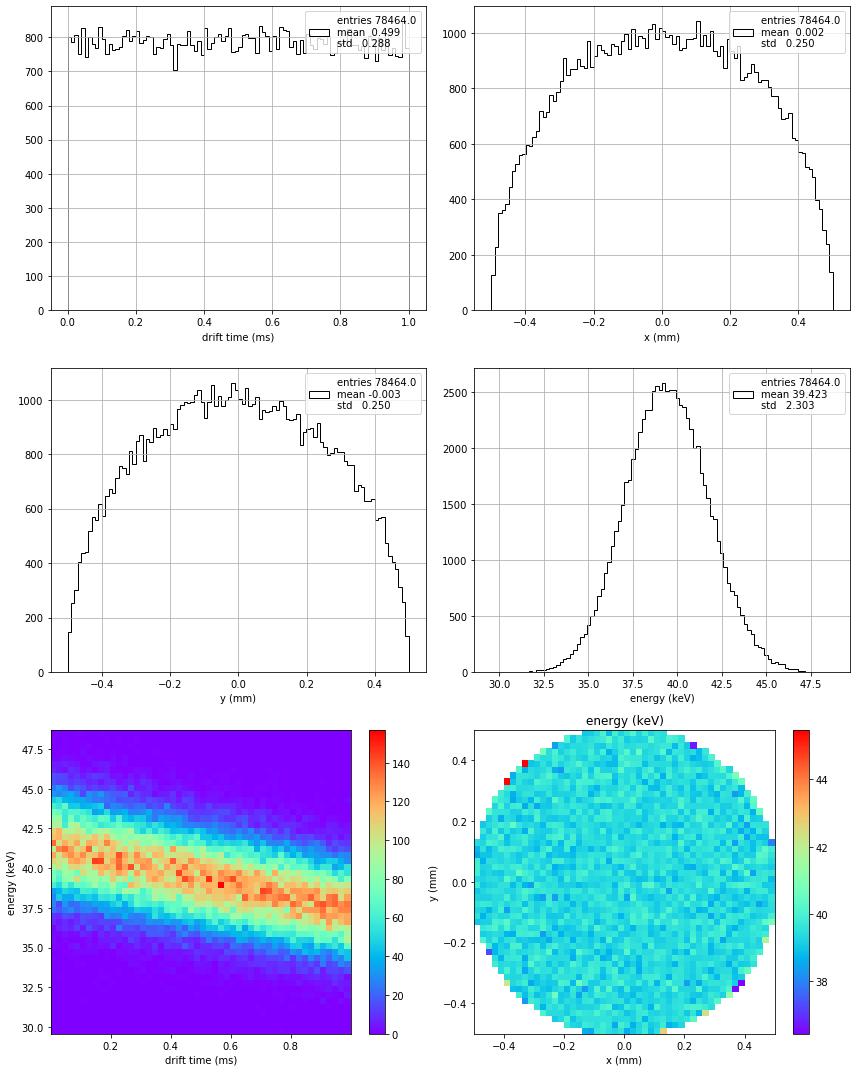

In [7]:
krana.plot_data(df, 50)

In [8]:
coors  = (df.dtime.values,)
energy = df.energy.values
bins   = 100
krmap  = prof.profile(coors, energy, bins)

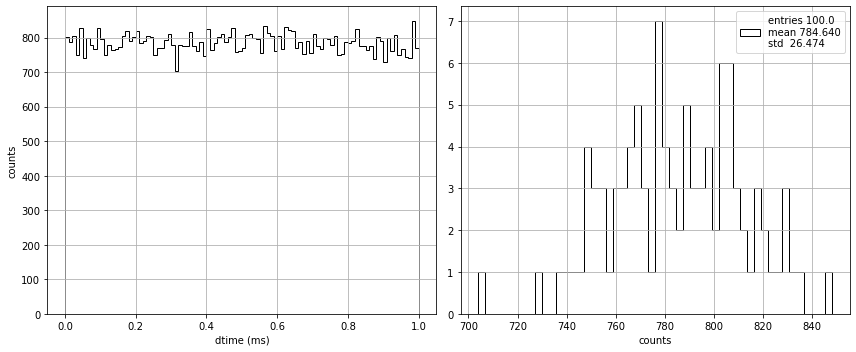

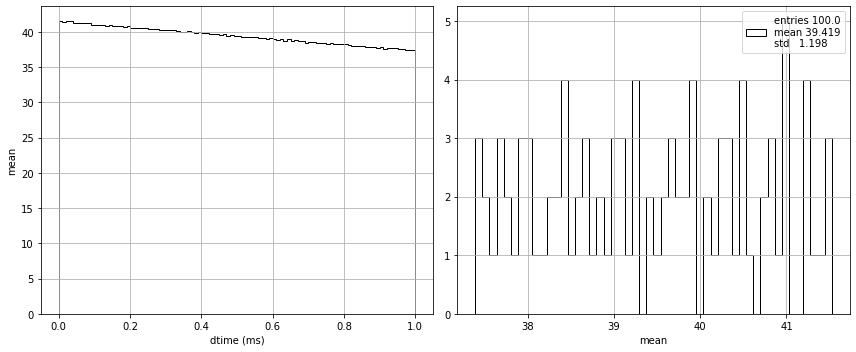

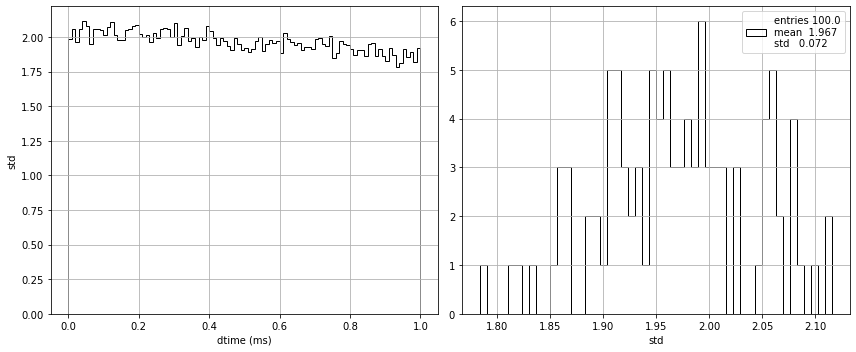

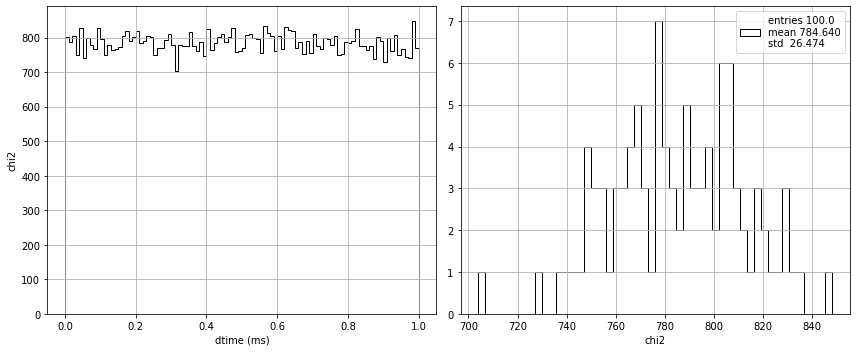

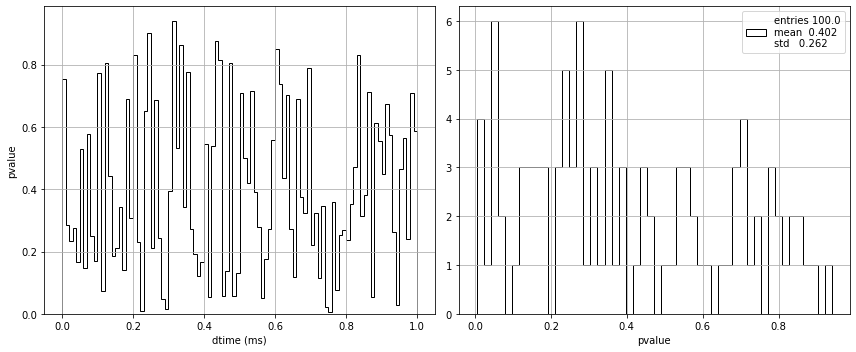

In [9]:
prof.plot_profile(krmap, coornames = ('dtime (ms)',))

### correction

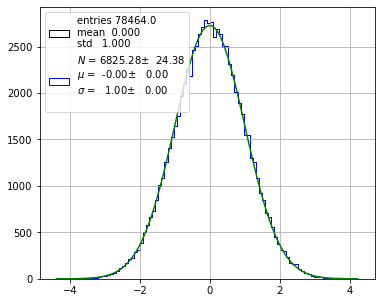

In [12]:
pltext.canvas(1, 1);
pltext.hist(krmap.residuals, 100);
pltext.hfit(krmap.residuals, 100, fun = 'gaus');

In [13]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

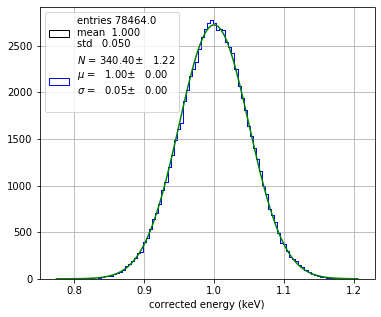

In [14]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)');

### Validate correction

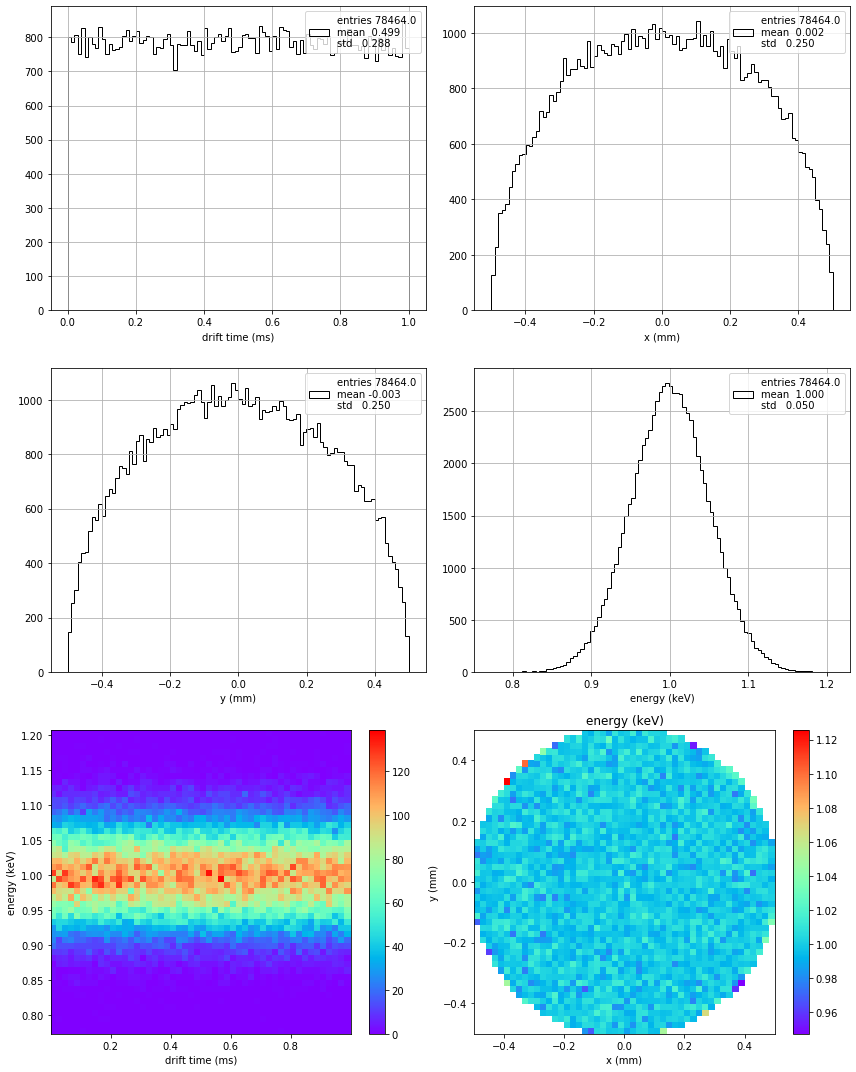

In [15]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50)

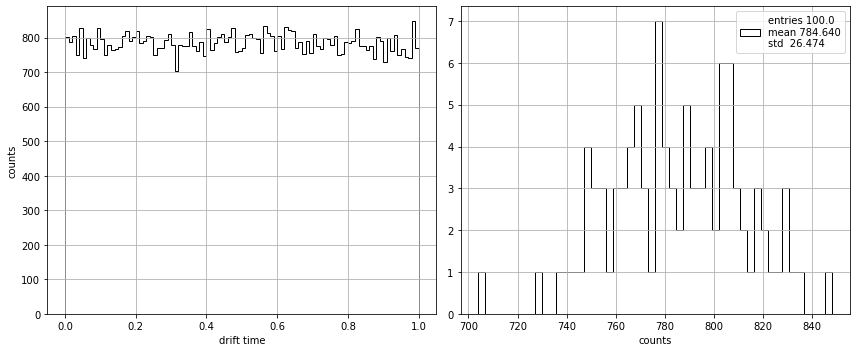

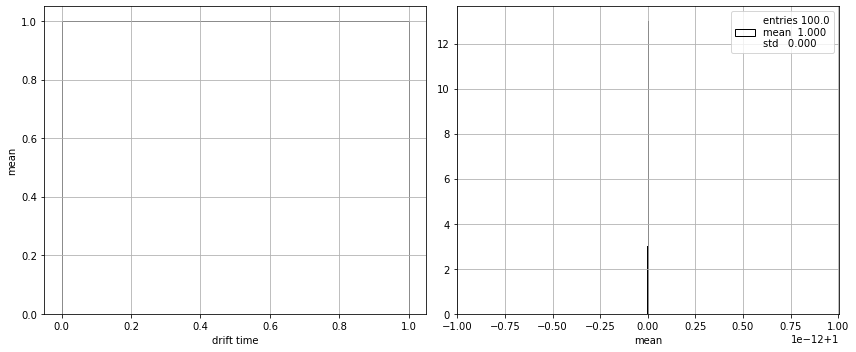

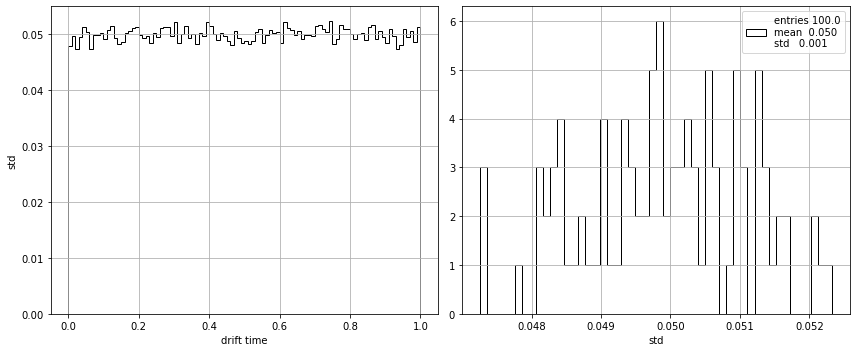

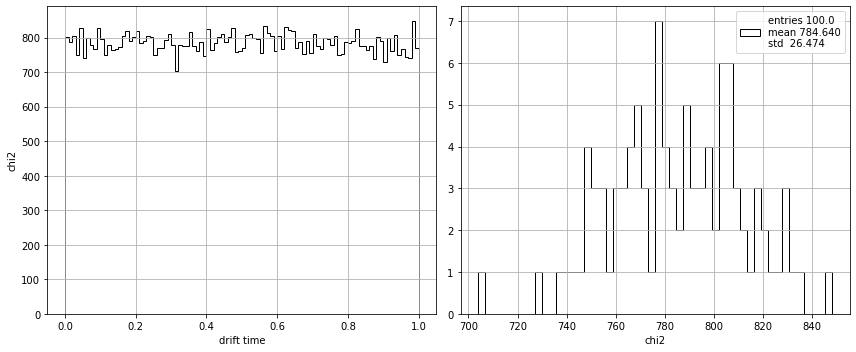

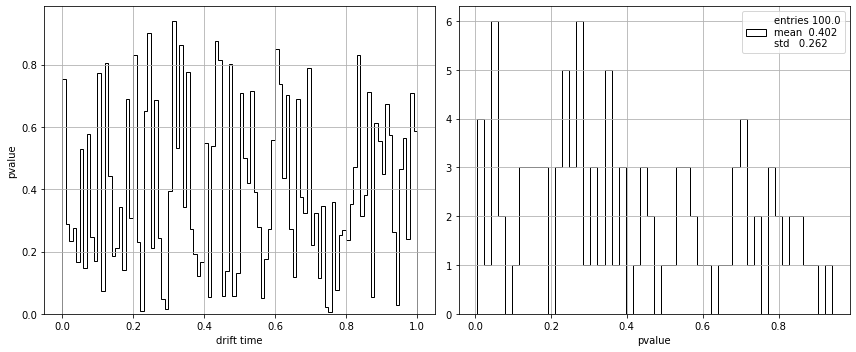

In [16]:
prof.plot_profile(corkrmap, coornames = ('drift time',))

## 2D

In [17]:
df = krana.generate_kr_toy(100000, tau = 0., beta = 0.2)
df

,dtime,x,y,energy
0,0.742895,-0.036350,-0.433606,32.782589
1,0.205174,0.239948,0.000258,42.039892
2,0.565295,0.176280,0.457767,30.525719
3,0.959268,0.181430,0.271570,37.541131
4,0.087056,-0.038179,0.445622,37.499332
...,...,...,...,...
78557,0.570985,-0.405293,0.030047,37.492155
78558,0.357363,-0.013699,0.401147,34.049450
78559,0.672549,-0.065573,0.134328,40.936496
78560,0.671631,0.166129,-0.075356,38.969827


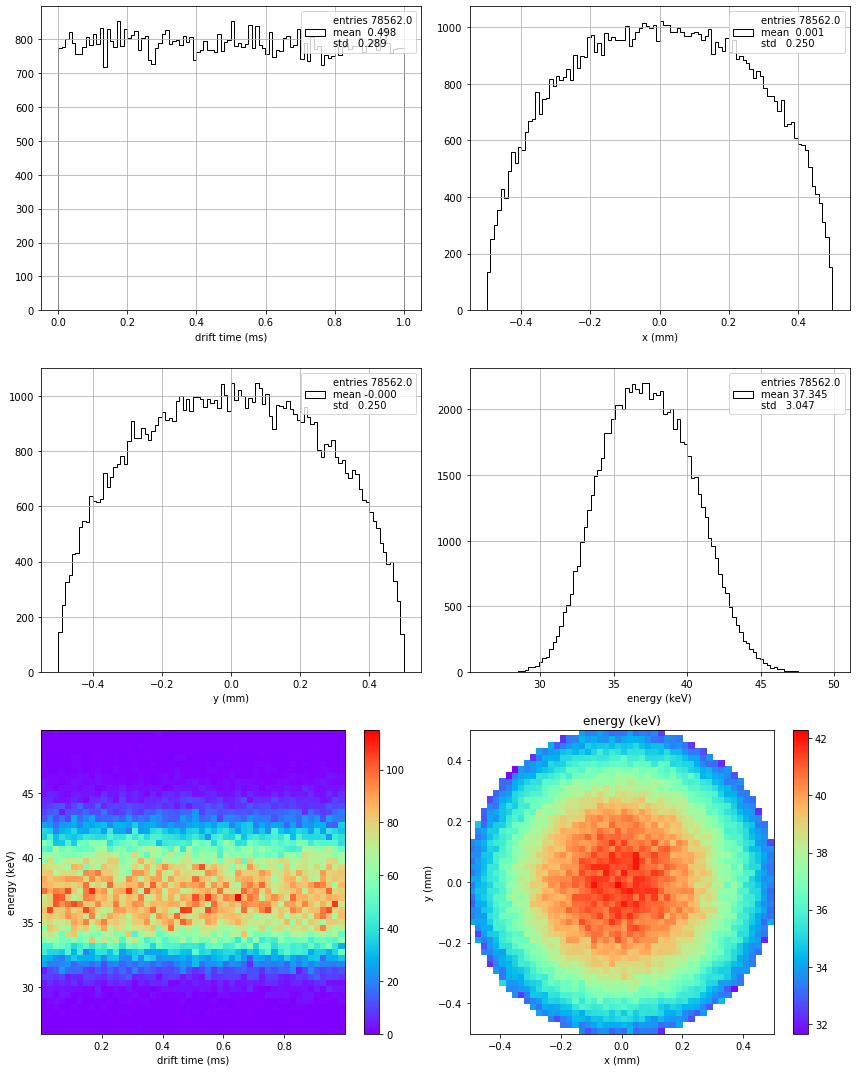

In [18]:
krana.plot_data(df, 50)

### kr  map

In [19]:
coors  = (df.x.values, df.y.values)
energy = df.energy.values
bins   = 40, 40
krmap  = prof.profile(coors, energy, bins)

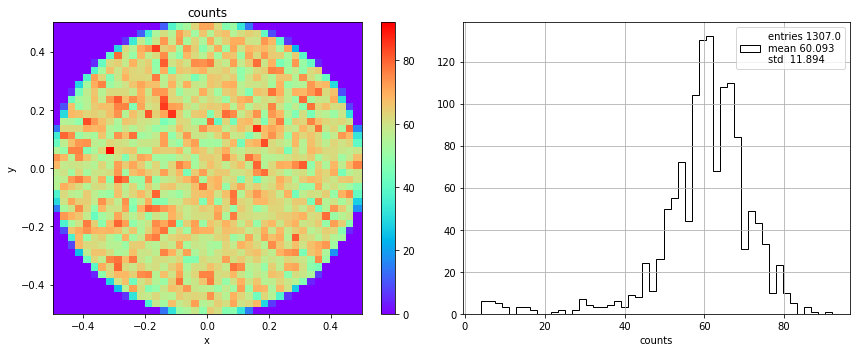

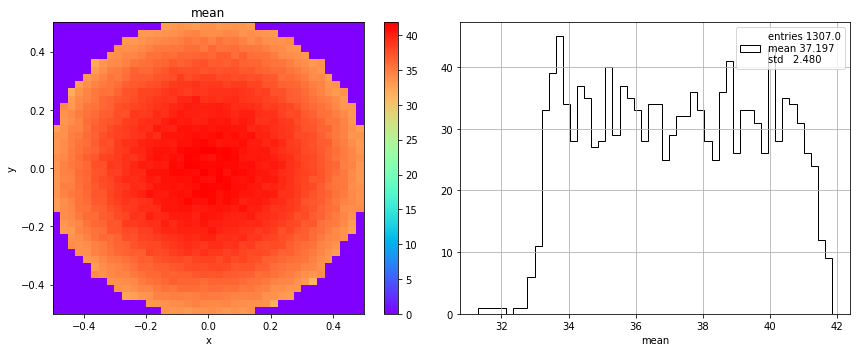

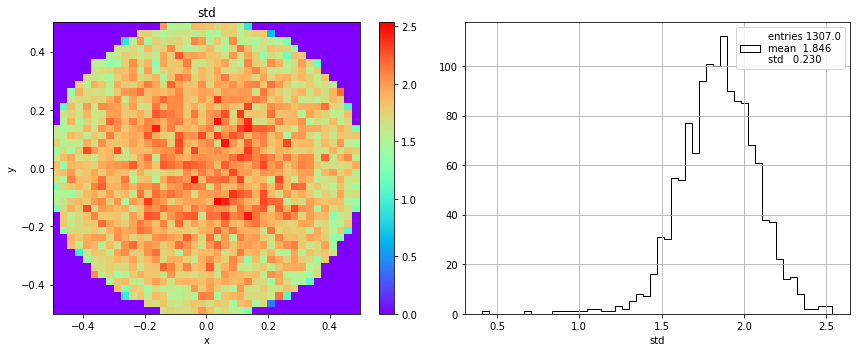

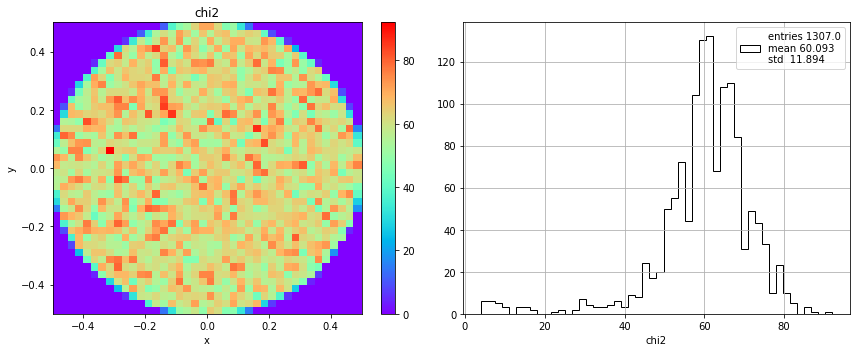

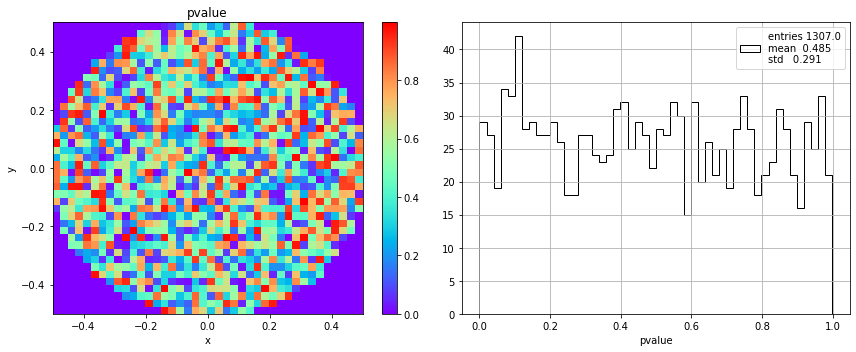

In [20]:
prof.plot_profile(krmap)

### Correction

In [21]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

Text(0.5, 0, 'corrected energy (keV)')

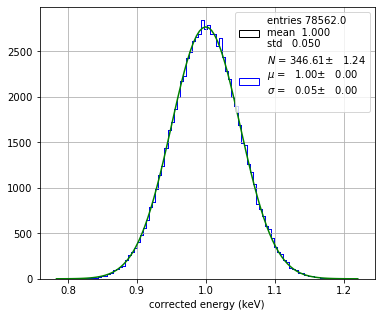

In [22]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)')

### Validate correction

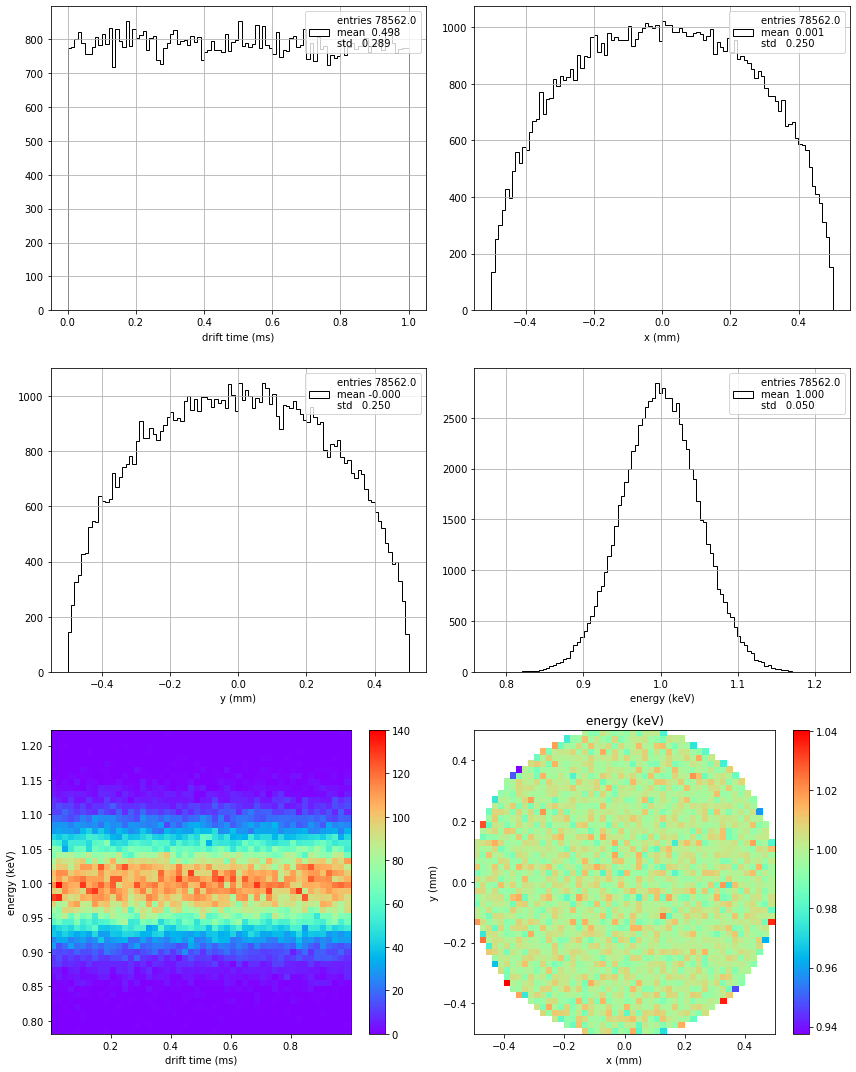

In [23]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50)

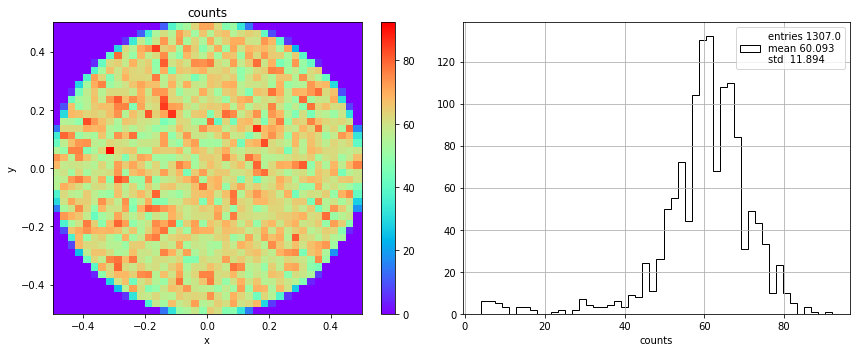

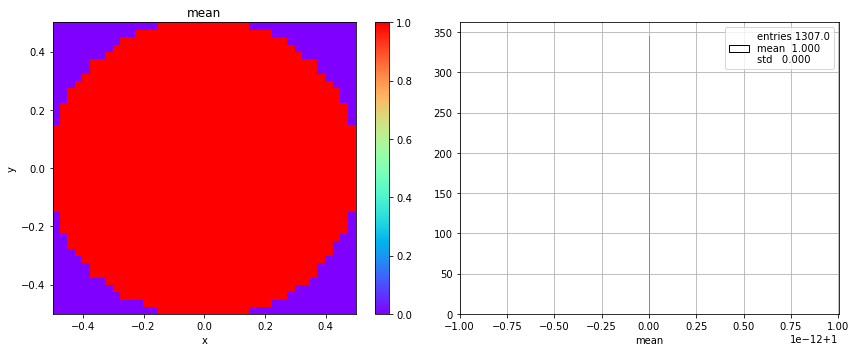

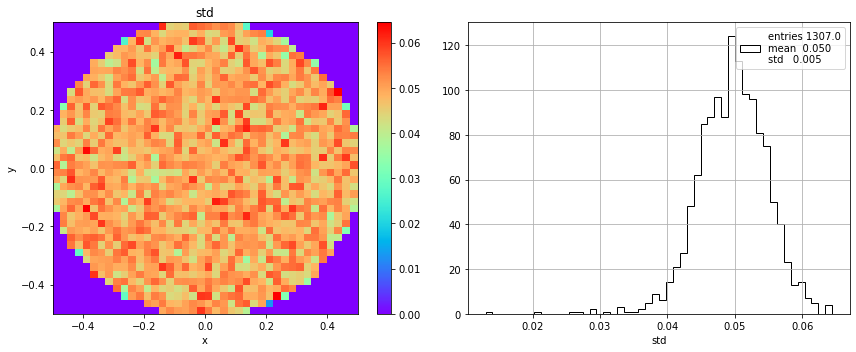

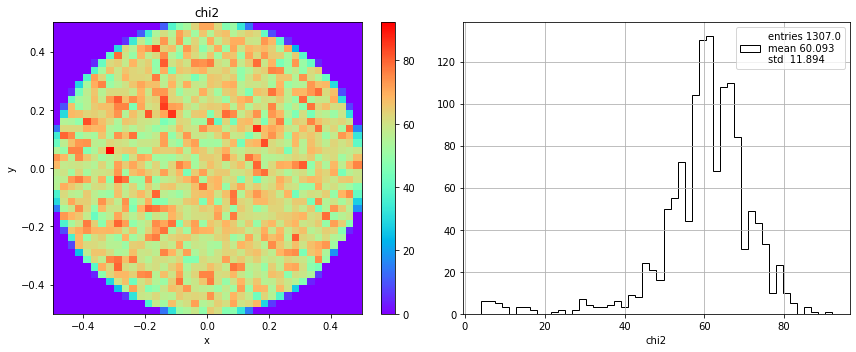

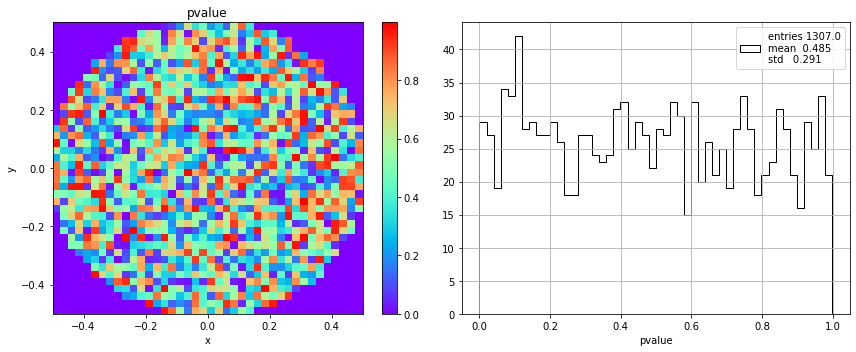

In [24]:
prof.plot_profile(corkrmap)

## 3D

In [25]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2)
df

,dtime,x,y,energy
0,0.342167,-0.102862,-0.191115,38.333363
1,0.001051,0.324792,0.133423,40.225937
2,0.011678,0.217208,-0.217619,37.677797
3,0.350283,0.369544,-0.029339,34.976473
4,0.600389,0.123831,0.304755,36.134966
...,...,...,...,...
78619,0.856621,-0.201205,-0.160313,34.666103
78620,0.906479,-0.254622,0.080926,33.645195
78621,0.967879,0.017337,-0.296029,37.106210
78622,0.212201,-0.222612,0.276105,35.492947


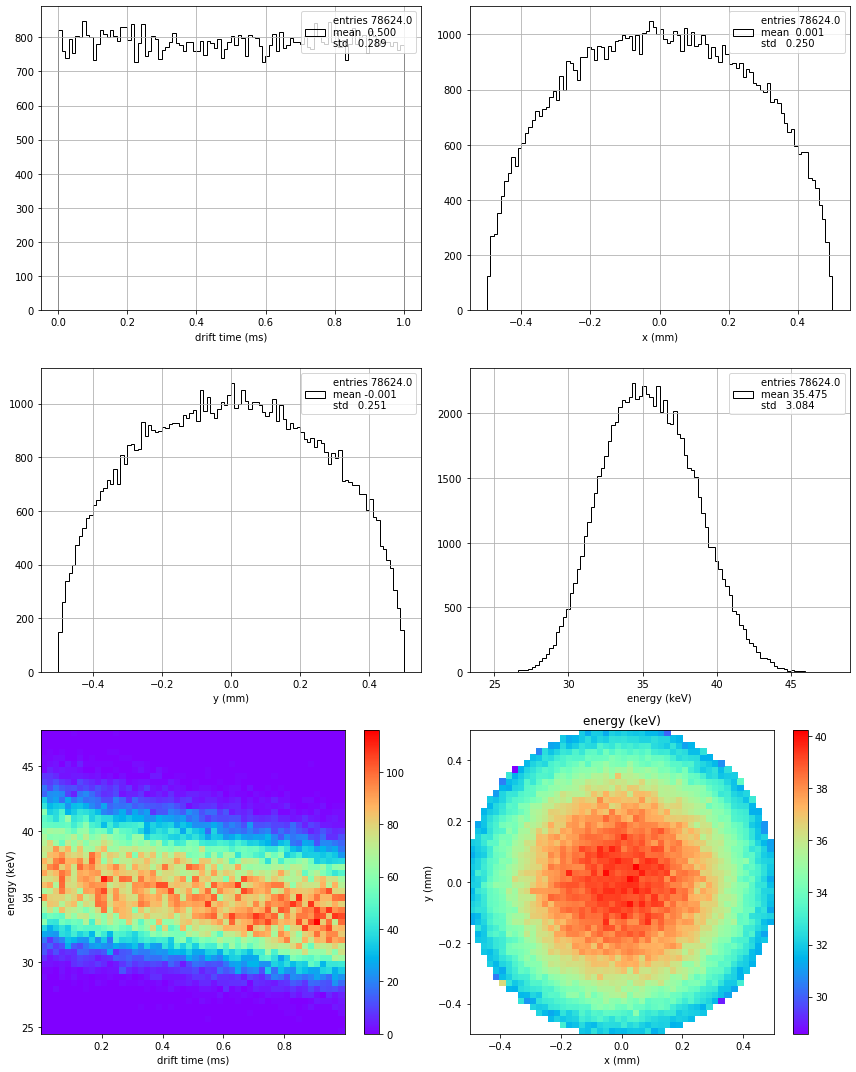

In [26]:
krana.plot_data(df, 50)

### Kr map

In [27]:
coors  = (df.x.values, df.y.values, df.dtime.values)
energy = df.energy.values
bins   = 20, 20, 4
krmap  = prof.profile(coors, energy, bins)

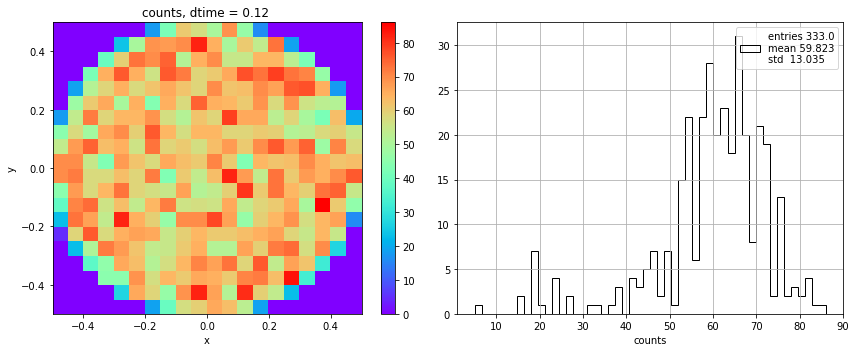

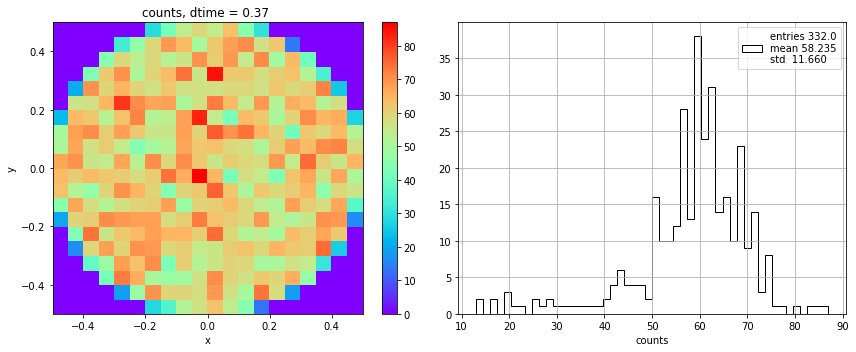

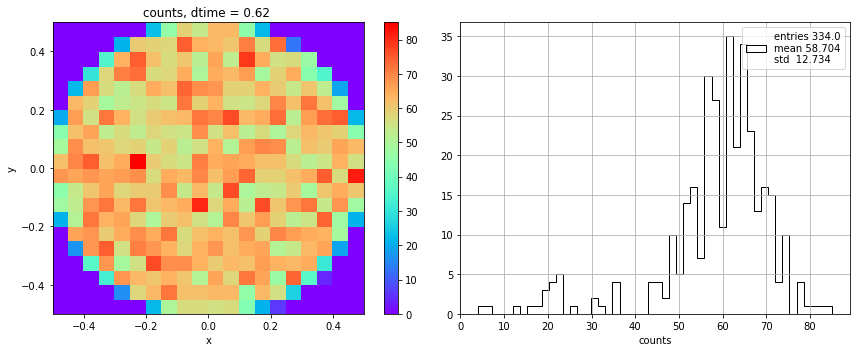

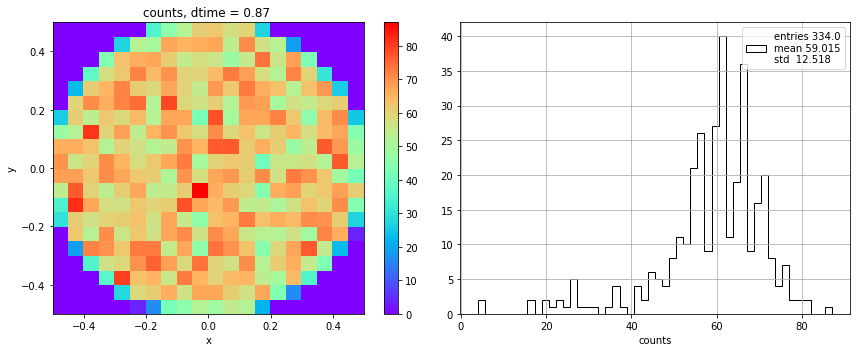

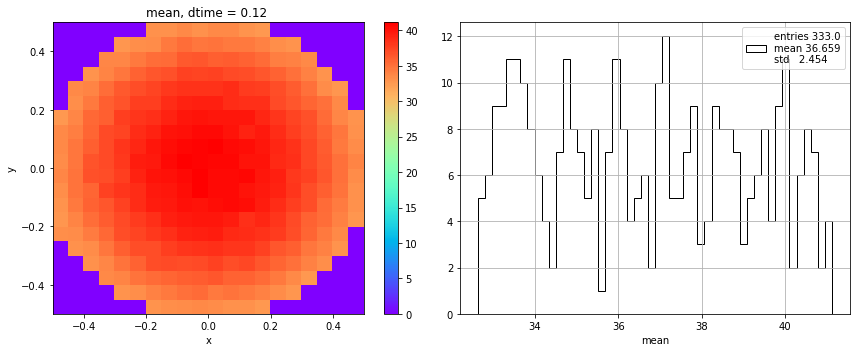

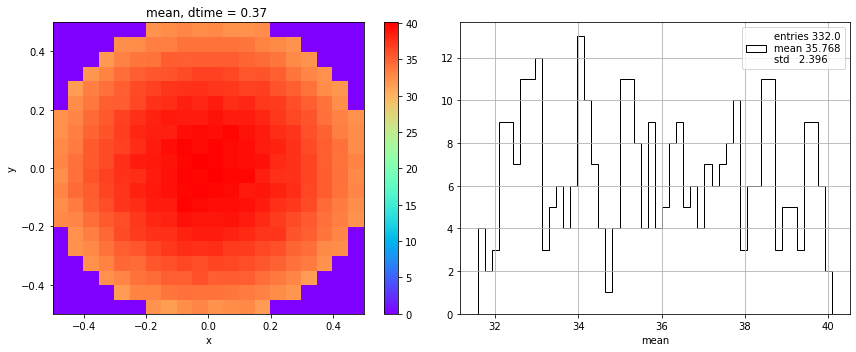

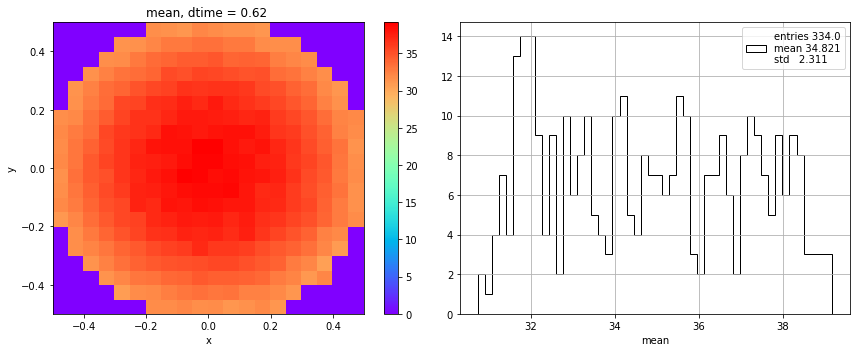

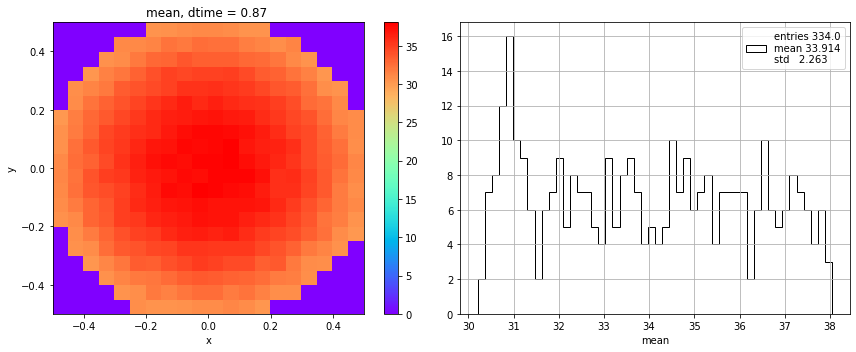

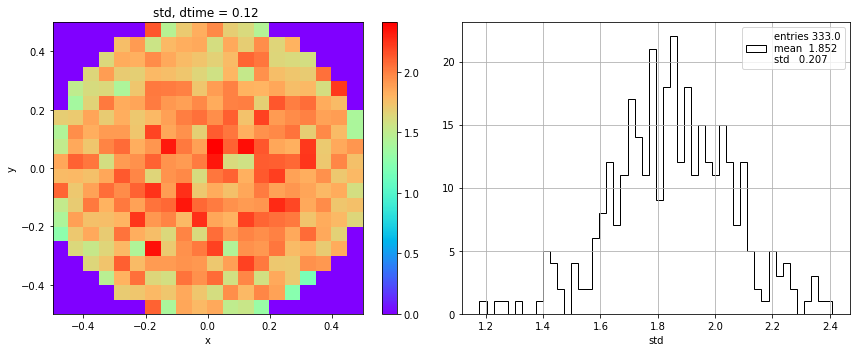

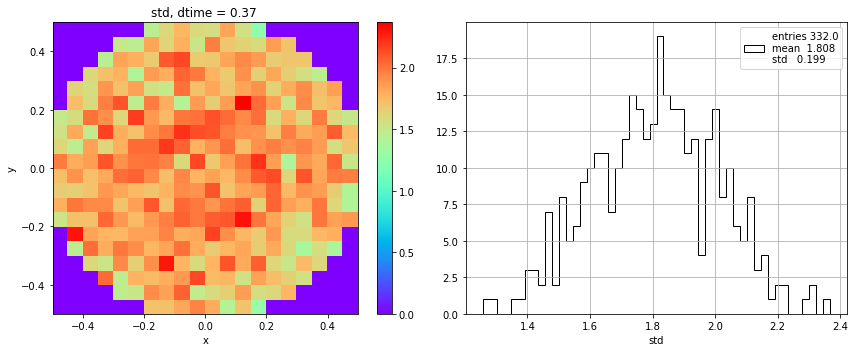

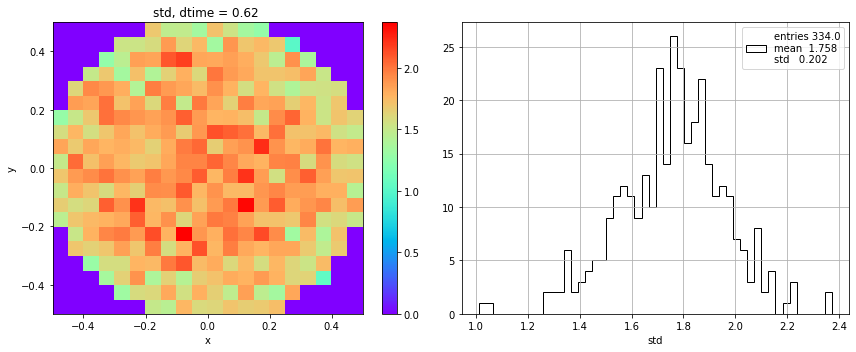

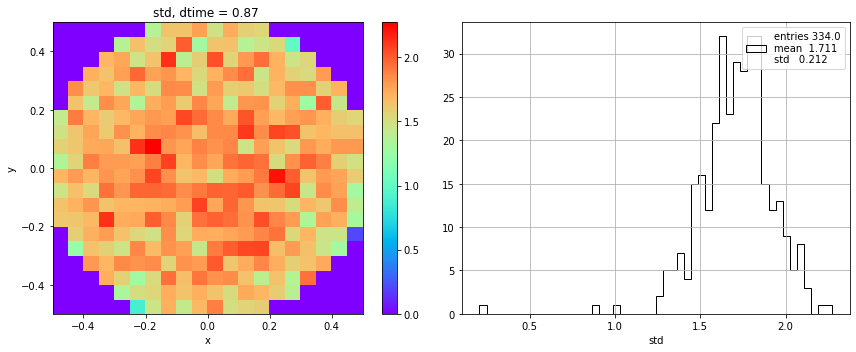

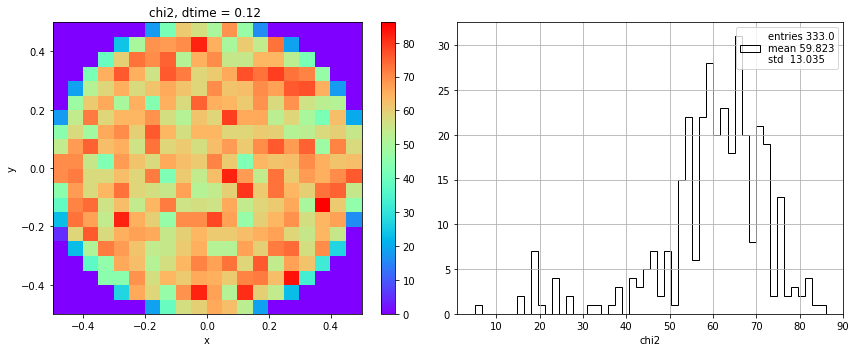

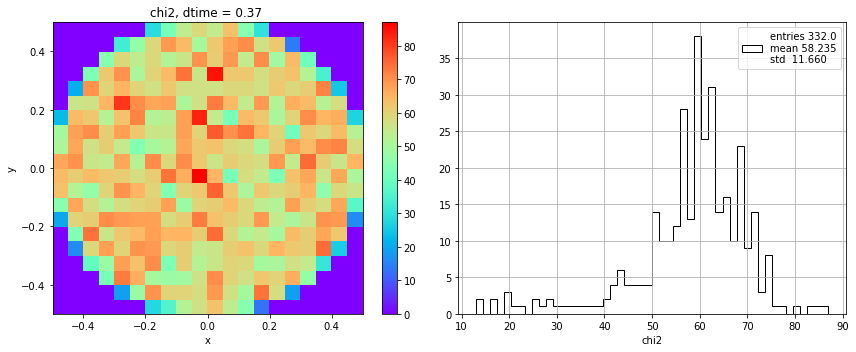

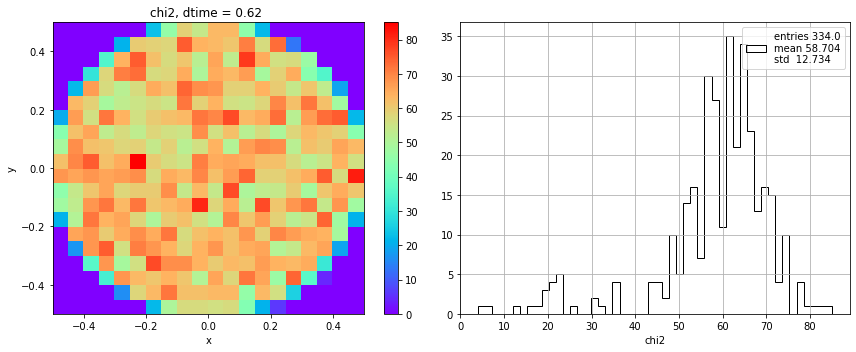

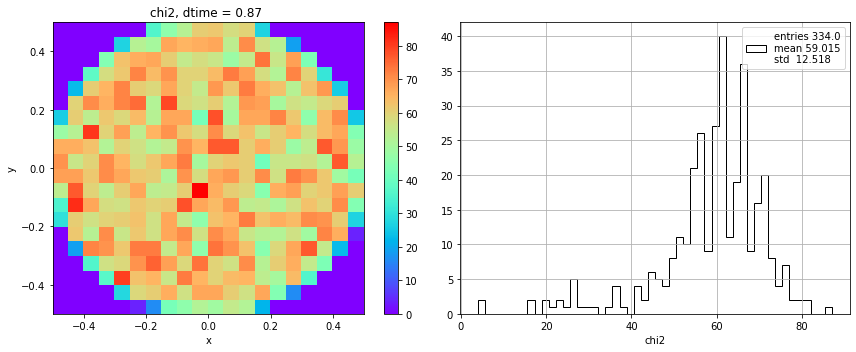

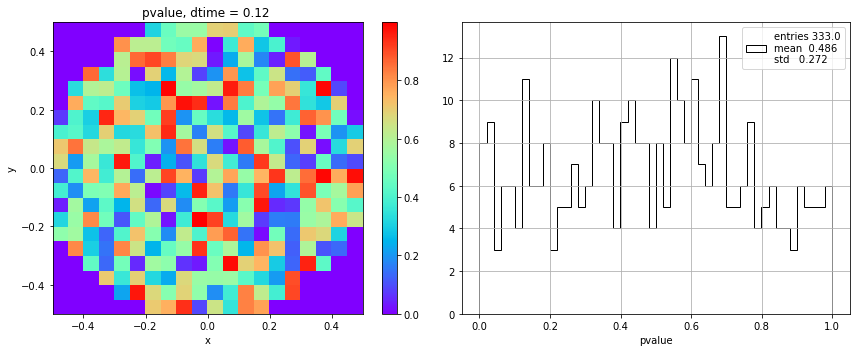

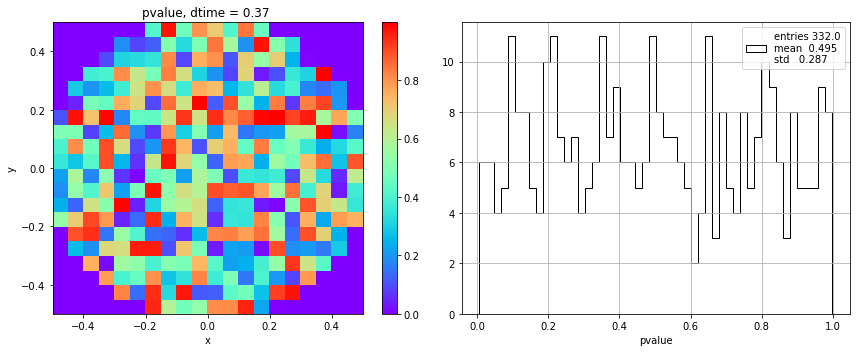

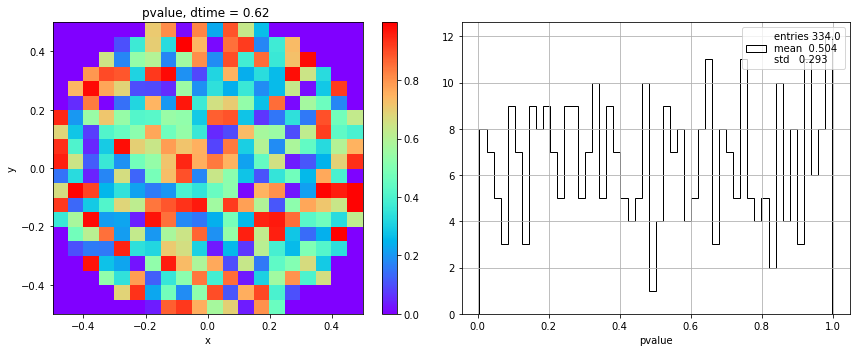

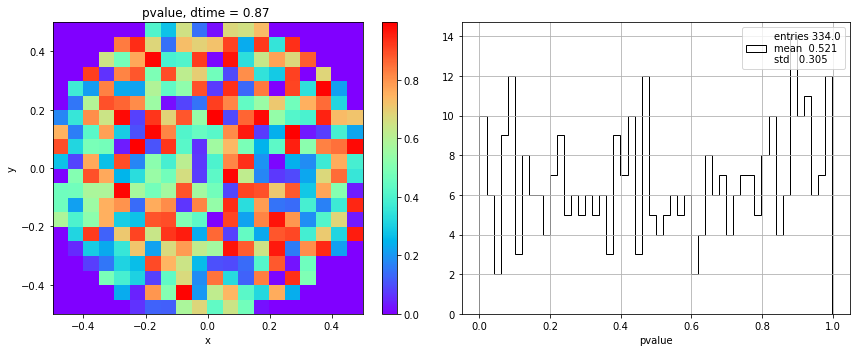

In [30]:
prof.plot_profile(krmap, coornames = ('x', 'y', 'dtime'));

### corrections

In [31]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

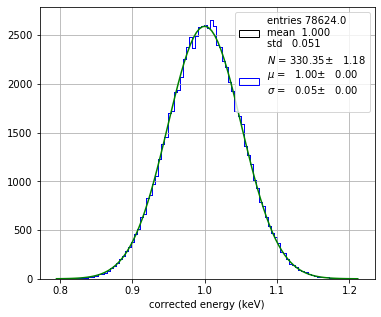

In [32]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus')
plt.xlabel('corrected energy (keV)');

### Validate correction

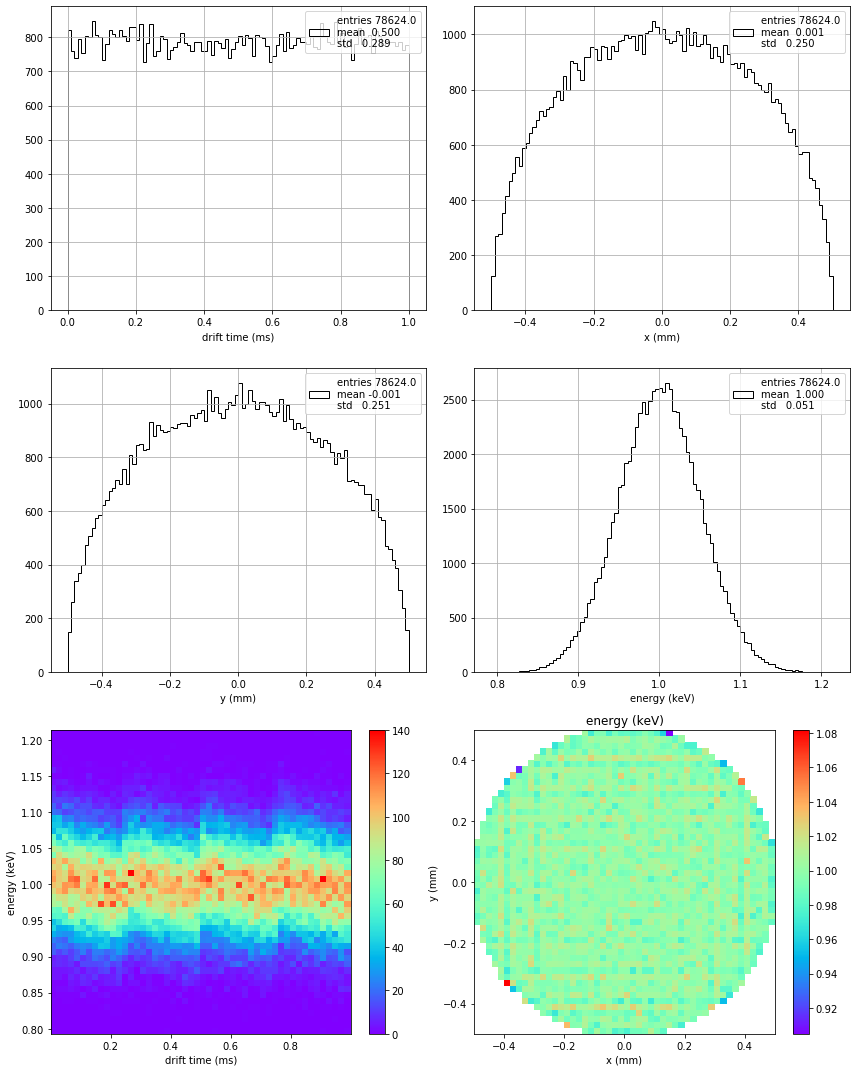

In [33]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50);

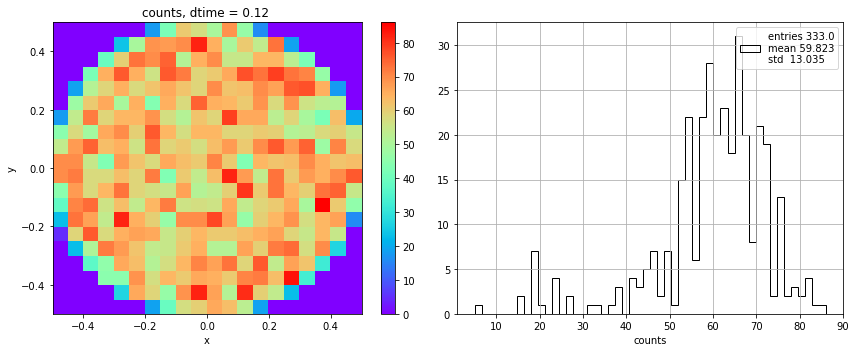

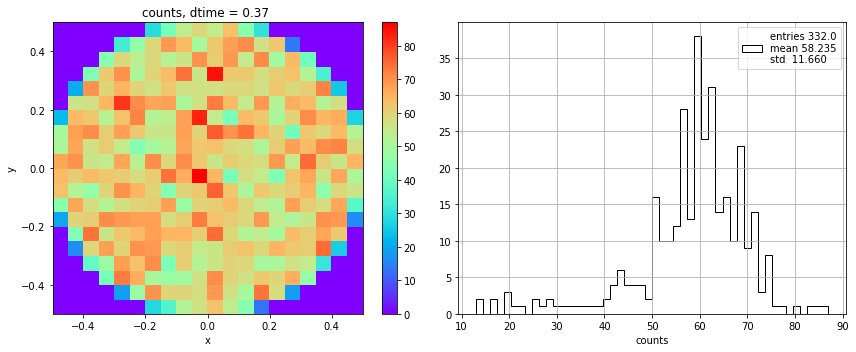

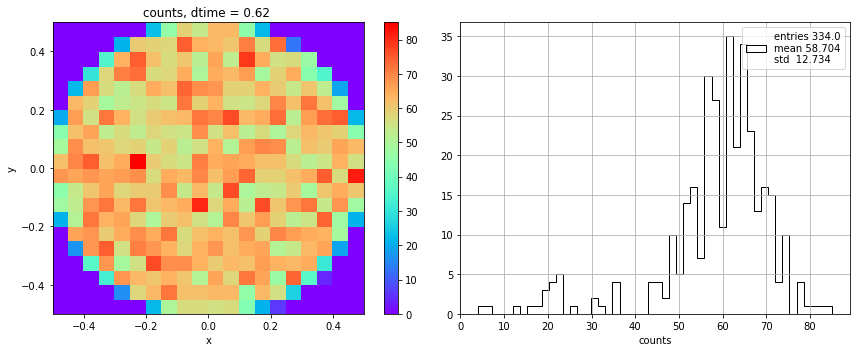

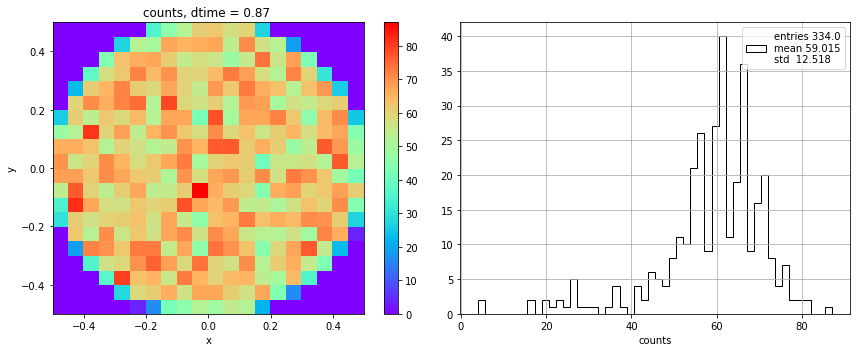

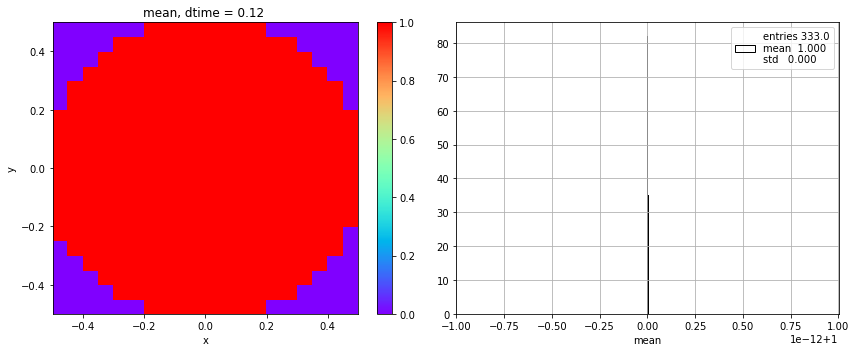

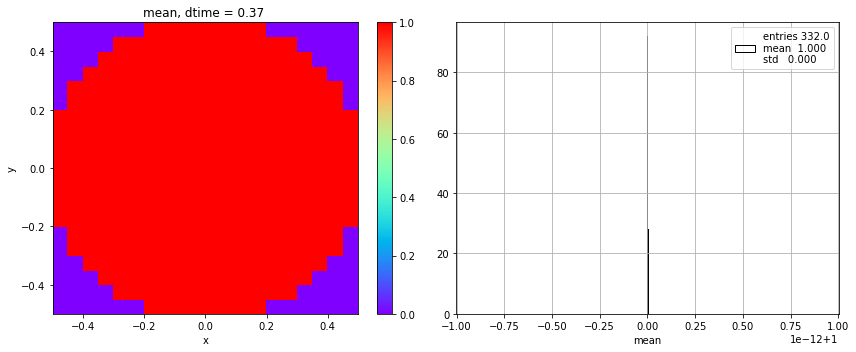

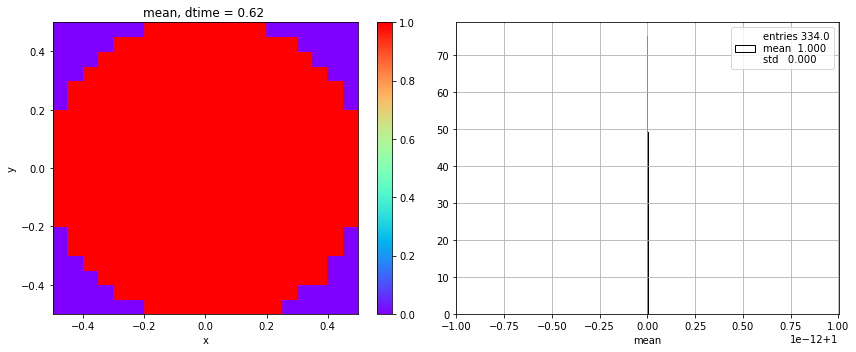

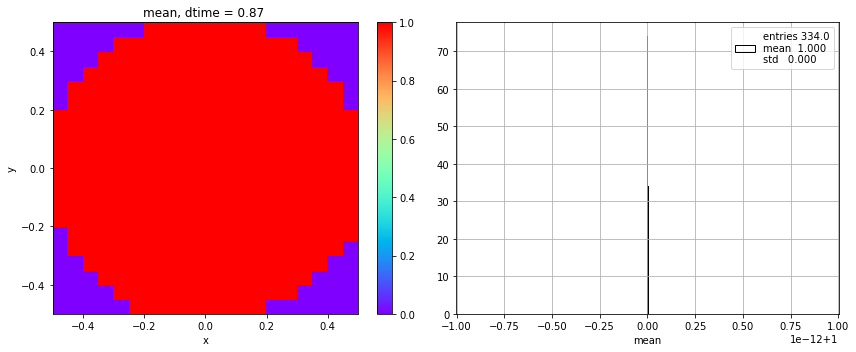

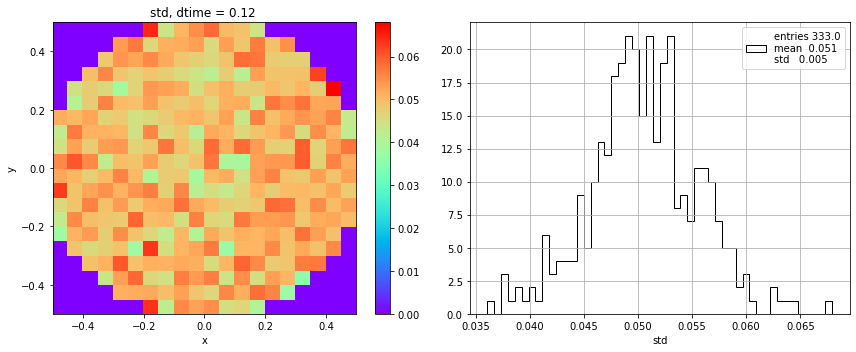

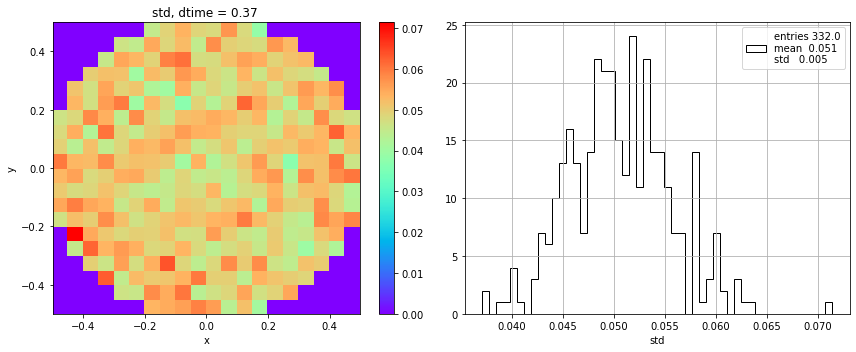

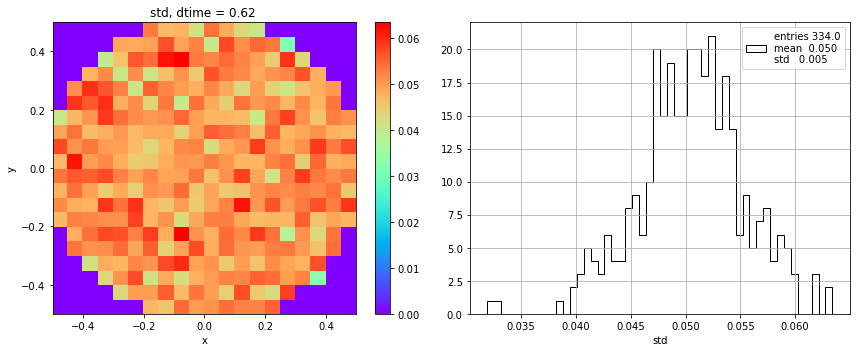

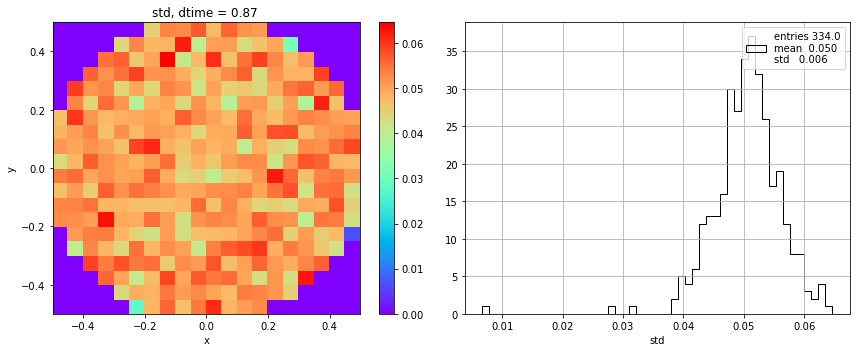

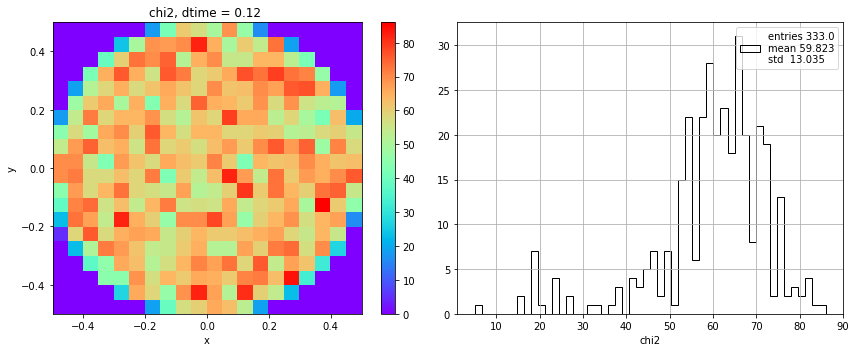

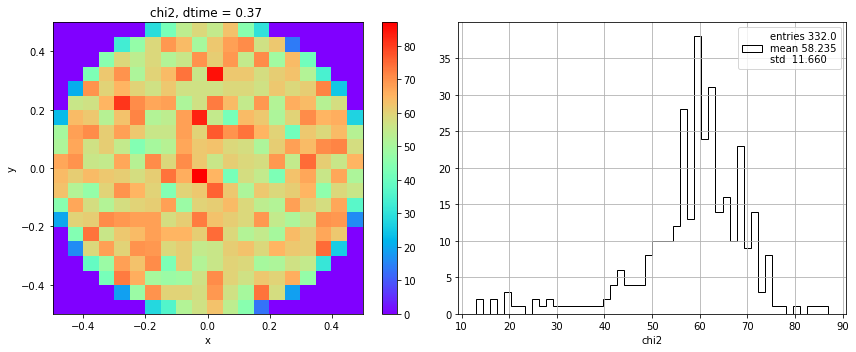

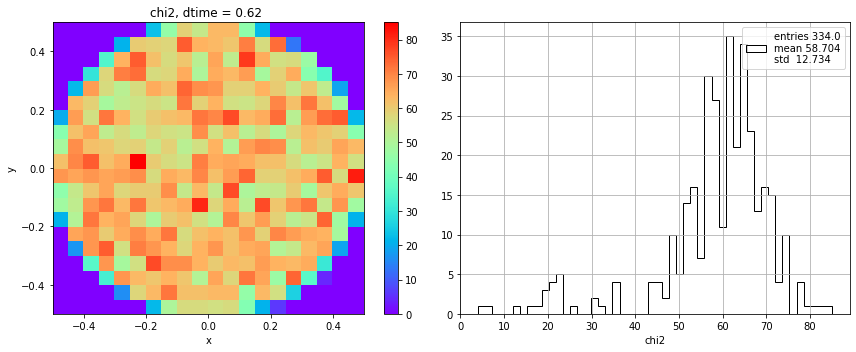

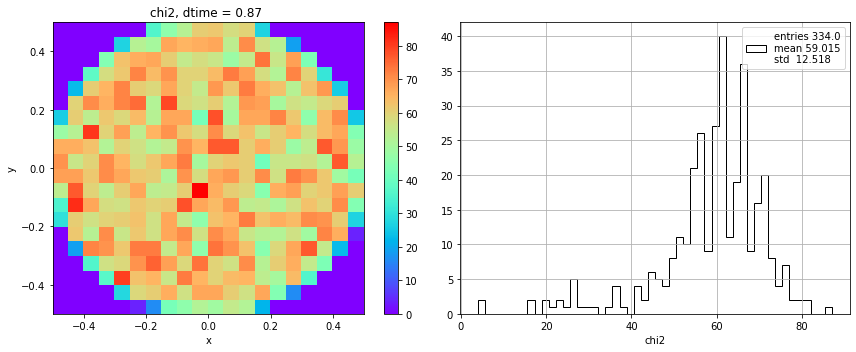

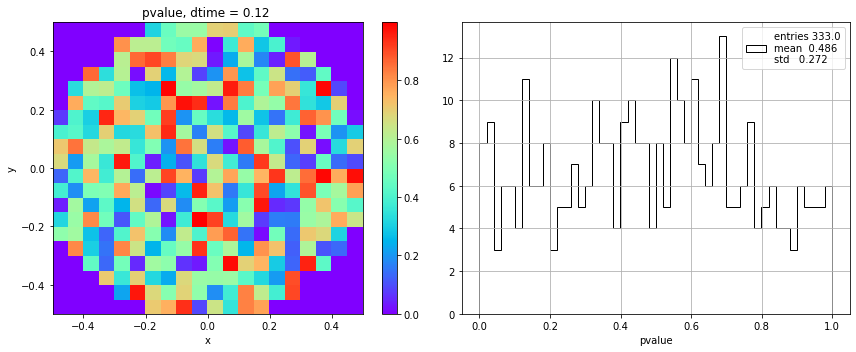

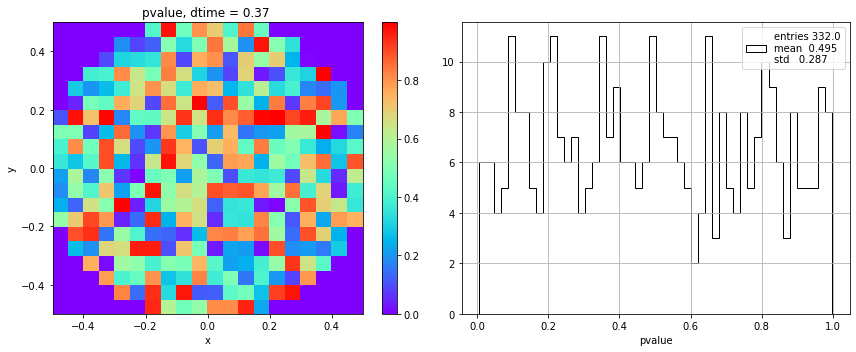

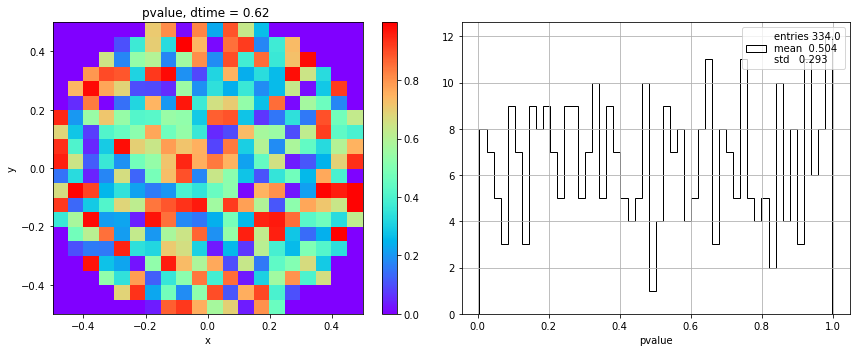

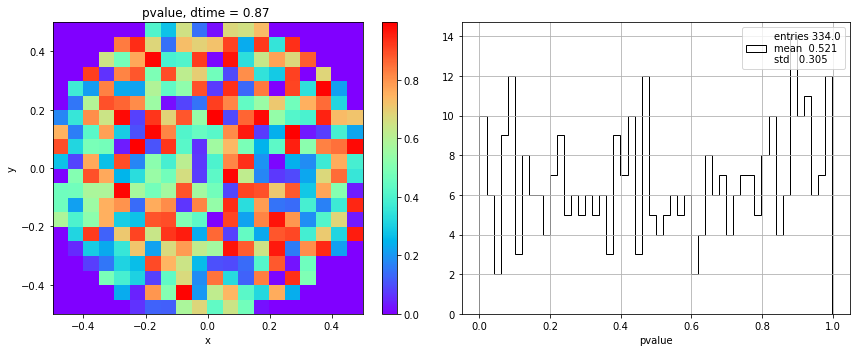

In [34]:
prof.plot_profile(corkrmap, coornames = ('x', 'y', 'dtime'));